# OneHotEncoder

_By Jeff Hale_

---

## Learning Objectives
By the end of this lesson students will be able to:

- Understand when you would want to use OneHotEncoder 
- Use OneHotEncoder to create dummy variables for training and test data
- Create a baseline model for a classification project
- Generate a confusion matrix
- Compute the sensitivity from a confusion matrix

---

## OneHotEncoder

One hot encoder is extremely helpful for dummy encoding variables for machine learning so that you don't have to worry about information from the test set leaking into the training set during the training process.

### Read in titanic data from seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df_titanic = sns.load_dataset('titanic', )
df_titanic.head()

In [ ]:
df_titanic.info()

## Split into x and y. 

Let's use `survived` for y and `sex` and `class` for X.

In [ ]:
X = df_titanic[['sex', 'class']]
y = df_titanic['survived']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
y.value_counts()

In [ ]:
y.value_counts(normalize=True)

## Split into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [ ]:
X_train.head(2)

In [ ]:
X_test.head(2)

In [ ]:
y_train.head(2)

In [ ]:
y_test.head(2)

### Make an object from the OneHotEncoder class. 

#### Warning! ☝️  The arguments are important here. 

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe

### Save the fit and transformed training data

In [ ]:
X_train_dummified = ohe.fit_transform(X_train, y_train)
X_train_dummified

### Save the transformed `X_test`

In [ ]:
X_test_dummified = ohe.transform(X_test)
X_test_dummified

In [ ]:
pd.get_dummies(X_train)

## Make a LogisticRegression model

In [ ]:
logreg = LogisticRegression()


### Fit the model

In [ ]:
logreg.fit(X_train_dummified, y_train)

### Create the model predictions

In [89]:
preds = logreg.predict(X_test_dummified)

In [90]:
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [77]:
probs = logreg.predict_proba(X_test_dummified)
probs

array([[0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.09931411, 0.90068589],
       [0.16955327, 0.83044673],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.09931411, 0.90068589],
       [0.16955327, 0.83044673],
       [0.91001718, 0.08998282],
       [0.16955327, 0.83044673],
       [0.16955327, 0.83044673],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.65389534, 0.34610466],
       [0.91001718, 0.08998282],
       [0.65389534, 0.34610466],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.16955327, 0.83044673],
       [0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.09931411, 0.90068589],
       [0.

In [58]:
logreg.score(X_test_dummified, y_test)

0.7309417040358744

### Generate the confusion matrix

In [59]:
confusion_matrix(y_test, preds)

array([[111,  24],
       [ 36,  52]])

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn

111

In [61]:
fp

24

In [62]:
fn

36

In [63]:
tp

52

### Try out the plot_confusion_matrix method

In [64]:
from sklearn.metrics import plot_confusion_matrix

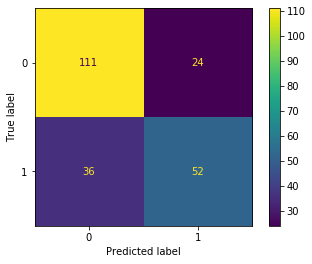

In [65]:
plot_confusion_matrix(logreg, X_test_dummified, y_test, values_format = '.5g')

Accuracy = 73%

#### Compute the True Postive Rate

In [66]:
tp/(tp+fn)

0.5909090909090909

#### Compute the Sensitivity

#### Compute the Recall

#### Compute the Precision

In [67]:
tp / (tp + fp)

0.6842105263157895

#### Compute the Specificity

In [68]:
tn/ (tn + fp)

0.8222222222222222

In [69]:
from sklearn.metrics import recall_score, precision_score

In [70]:
recall_score(y_test, preds)

0.5909090909090909

In [71]:
precision_score(y_test, preds)

0.6842105263157895

In [72]:
from sklearn.metrics import classification_report

In [73]:
classification_report(y_test, preds, output_dict=True)

{'0': {'precision': 0.7551020408163265,
  'recall': 0.8222222222222222,
  'f1-score': 0.7872340425531914,
  'support': 135},
 '1': {'precision': 0.6842105263157895,
  'recall': 0.5909090909090909,
  'f1-score': 0.6341463414634148,
  'support': 88},
 'accuracy': 0.7309417040358744,
 'macro avg': {'precision': 0.719656283566058,
  'recall': 0.7065656565656566,
  'f1-score': 0.7106901920083031,
  'support': 223},
 'weighted avg': {'precision': 0.7271269140179083,
  'recall': 0.7309417040358744,
  'f1-score': 0.7268227524370463,
  'support': 223}}

### Make the ROC curve

In [74]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

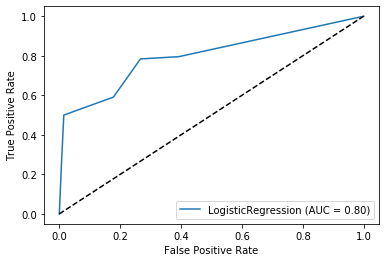

In [75]:
plot_roc_curve(logreg, X_test_dummified, y_test);
plt.plot([0, 1], [0, 1], 'k--')

### What's the ROC AUC score?

Recall that `.predict_proba()` method will return the probabilities of both classes in a numpy array.

In [87]:
both_probs = logreg.predict_proba(X_test_dummified)
both_probs[:5]

array([[0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.09931411, 0.90068589]])

In [88]:
from sklearn.metrics import f1_score

### F1 score

2 *    (Precision * Recall)      /      (Precision  + Recall)

In [91]:
f1_score(y_test, preds)

0.6341463414634148

### Balanced Accuracy Score

Average of TPR and TNR

(Sensitivity + Specificity) / 2

In [98]:
specificity = tn / (tn + fp)
specificity 

0.8222222222222222

In [99]:
recall = recall_score(y_test, preds)
recall

0.5909090909090909

In [103]:
(specificity + recall) /2

0.7065656565656566

In [93]:
from sklearn.metrics import balanced_accuracy_score

In [94]:
balanced_accuracy_score(y_test, preds)

0.7065656565656566

### Put all the predicted probabilities for class 1 in a numpy array.

Here we use a list comprehension and the `np.full()` method to make an array with just the predicted probabilities.

In [84]:
pred_proba = [probability[1] for probability in logreg.predict_proba(X_test_dummified)]
probs = np.full(y_test.shape[0], pred_proba)

In [83]:
probs[:5]

array([[0.91001718, 0.08998282],
       [0.777694  , 0.222306  ],
       [0.91001718, 0.08998282],
       [0.91001718, 0.08998282],
       [0.09931411, 0.90068589]])

In [85]:
roc_auc_score(y_test, probs)

0.798526936026936

### Just passing an array of the predictions (1 or 0) does not work!

#### How good is that score?

Not terrible. But we can likely improve our model.

## Baseline model

In [ ]:
y_train.value_counts(normalize=True)

#### Predict the most common class every time.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(np.zeros_like(y_test), y_test)

### How does our LogisticRegression model perform compared to the baseline model?

### How could we try to improve our model?

# Summary

You've seen how to use OneHotEncoder.

You've practiced computing the recall.

### Check for Understanding

- Why would you want to use OneHotEncoder instead of pd.get_dummies()?

- How do you use OneHotEncoder with the test data?